# Get File Folders

In [193]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [20]:
import os
import pickle
import trimesh
os.listdir()

['collisions.pickle',
 'docker',
 '.DS_Store',
 'VislCollision.ipynb',
 'README.md',
 'input_mesh.pickle',
 '.ipynb_checkpoints',
 '.git',
 'backup',
 'data',
 'saveCollisionMesh.py',
 'input_mesh.stl']

In [365]:
tmp = os.listdir('data')
tmp.sort()
tmp

['.DS_Store',
 'cortexode',
 'corticalflow',
 'deepcsr',
 'modified_svg_pial',
 'modified_svg_white',
 'pialnn',
 'topofit',
 'vox2cortex']

In [366]:
tmp = []
for f in folders1:
    if f[0] in ['c','d','p','v']:
        tmp.append(f)
folders1 = tmp
folders1

['cortexode', 'corticalflow', 'deepcsr', 'pialnn', 'vox2cortex']

In [367]:
tmp = []
for f in folders2:
    if f[0] in ['c','d','t','v']:
        tmp.append(f)
folders2 = tmp
folders2

['cortexode', 'corticalflow', 'deepcsr', 'topofit', 'vox2cortex']

# Get collisions, mesh data

In [33]:
def get_collisions_mesh(name):
    
    input_mesh = trimesh.load(name + '.stl')
    
    file = name + '.pickle'
    with open(file, 'rb') as f:
        collisions = pickle.load(f)
        
    return input_mesh, collisions

def run(folders, name, pre = 'backup/'):
    input_meshes = []
    collisions = []
    for folder in folders:
        fullname = pre + folder + '/' + name
        a, b = get_collisions_mesh(fullname)
        input_meshes.append(a)
        collisions.append(b)
    return input_meshes, collisions

In [38]:
input_mesh1,collisions1 = run(folders1, 'pp')
input_mesh2,collisions2 = run(folders2, 'pw')

In [385]:
from pprint import pprint

print('pial collision counts:')
print('model'.ljust(20,' '), 'collisions'.ljust(10,' '),'samples'.ljust(10,' '), 'ratio')
for c, a,b in zip(input_mesh1, folders1, collisions1):
    print(a.ljust(20,' '),str(len(b)).ljust(10,' '), str(c.faces.shape[0]).ljust(10,' '), round(1.0*len(b)/c.faces.shape[0],4))
print('\n\n')

print('white collision counts')
print('model'.ljust(20,' '), 'collisions'.ljust(10,' '),'samples'.ljust(10,' '), 'ratio')
for c, a,b in zip(input_mesh2, folders2, collisions2):
    print(a.ljust(20,' '),str(len(b)).ljust(10,' '), str(c.faces.shape[0]).ljust(10,' '), round(1.0*len(b)/c.faces.shape[0],4))

pial collision counts:
model                collisions samples    ratio
cortexode            1687       241848     0.007
corticalflow         2089       759936     0.0027
deepcsr              0          346036     0.0
pialnn               26259      242758     0.1082
vox2cortex           2762       84028      0.0329



white collision counts
model                collisions samples    ratio
cortexode            118        241848     0.0005
corticalflow         921        759936     0.0012
deepcsr              0          408028     0.0
topofit              26         327680     0.0001
vox2cortex           23         84028      0.0003


# Visualize with Pyrender

In [40]:
import pyrender

In [51]:
def preview(input_mesh, collisions):
    
    material = pyrender.MetallicRoughnessMaterial(
    metallicFactor=0.0,
    alphaMode='BLEND',
    baseColorFactor=[0.3, 0.3, 0.3, 0.99])
    recv_material = pyrender.MetallicRoughnessMaterial(
        metallicFactor=0.0,
        alphaMode='BLEND',
        baseColorFactor=[0.0, 0.9, 0.0, 1.0])
    intr_material = pyrender.MetallicRoughnessMaterial(
        metallicFactor=0.0,
        alphaMode='BLEND',
        baseColorFactor=[0.9, 0.0, 0.0, 1.0])

    scene = pyrender.Scene(bg_color=[0.0, 0.0, 0.0, 1.0],
                                ambient_light=(0.3, 0.3, 0.3))

    
    recv_faces = input_mesh.faces[collisions[:, 0]]
    intr_faces = input_mesh.faces[collisions[:, 1]]
    
    main_mesh = pyrender.Mesh.from_trimesh(input_mesh, material=material)
    recv_mesh = pyrender.Mesh.from_trimesh(
        trimesh.Trimesh(input_mesh.vertices, recv_faces),
        material=recv_material)
    intr_mesh = pyrender.Mesh.from_trimesh(
        trimesh.Trimesh(input_mesh.vertices, intr_faces),
        material=intr_material)

    scene.add(main_mesh)
    scene.add(recv_mesh)
    scene.add(intr_mesh)
    return main_mesh, recv_mesh, intr_mesh, scene

In [120]:
idx = 3
main_mesh, recv_mesh, intr_mesh, scene = preview(input_mesh1[idx],collisions1[idx])
pyrender.Viewer(scene, use_raymond_lighting=True, cull_faces=False)

/Users/mialu/opt/anaconda3/lib/python3.9/site-packages/trimesh/util.py:132: RuntimeWarning: invalid value encountered in reciprocal
  norm[valid] **= -1


Viewer=(width=640, height=480)

In [57]:
# help(pyrender.Viewer)

# Visualize with Pyvista

In [161]:
# Define the colors we want to use
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

In [204]:

blue = np.array([12 / 256, 238 / 256, 246 / 256, 1.0])
black = np.array([11 / 256, 11 / 256, 11 / 256, 1.0])
grey = np.array([189 / 256, 189 / 256, 189 / 256, 1.0])
yellow = np.array([255 / 256, 247 / 256, 0 / 256, 1.0])
red = np.array([1.0, 0.0, 0.0, 1.0])

mapping = np.linspace(0, 1, 256)
newcolors = np.empty((256, 4))
newcolors[mapping >= 1] = red
newcolors[mapping < 1] = blue
newcolors[mapping < 0.5] = grey

# Make the colormap from the listed colors
my_colormap = ListedColormap(newcolors)

In [163]:
folders1

['cortexode', 'corticalflow', 'deepcsr', 'pialnn', 'vox2cortex']

In [188]:
folder

'topofit'

In [189]:
idx = 3
folder = folders2[idx]
m = pv.read('backup/'+folder + '/pw.stl')

input_mesh, collisions = get_collisions_mesh('backup/' + folder + '/pw')

tmp = [0] * input_mesh.faces.shape[0]
for c in collisions[:,0]:
    tmp[c] = 0.5
for c in collisions[:,1]:
    tmp[c] = 1

In [192]:
len(collisions)

26

In [190]:
import pyvista as pv

pl = pv.Plotter()
actor = pl.add_mesh(m, color='grey')
actor = pl.add_mesh(m, color='red', scalars = tmp, cmap = my_colormap)
# actor = pl.add_mesh(m3, color='blue')
pl.remove_scalar_bar()
pl.show()

Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa504e66f40_33&reconnect=auto' style='wid…

## Modify color to inferno

In [201]:
colors = mpl.colormaps['inferno']

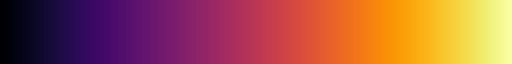

In [198]:
colors

In [227]:
light = [255/256,255/256,0] + [1]
dark = [152/256,0,255/256] + [1]
grey = np.array([220 / 256, 220 / 256, 220 / 256, 1.0])
mapping = np.linspace(0, 1, 256)
newcolors = np.empty((256, 4))
newcolors[mapping >= 1] = dark
newcolors[mapping < 1] = light
newcolors[mapping < 0.5] = grey

# Make the colormap from the listed colors
my_colormap = ListedColormap(newcolors)

In [228]:
idx = 4
folder = folders1[idx]
pmodel = 'pp'
m = pv.read('backup/'+folder + '/' + pmodel + '.stl')

input_mesh, collisions = get_collisions_mesh('backup/' + folder + '/' + pmodel)

tmp = [0] * input_mesh.faces.shape[0]
for c in collisions[:,0]:
    tmp[c] = 0.5
for c in collisions[:,1]:
    tmp[c] = 1

In [229]:
import pyvista as pv

pl = pv.Plotter()
actor = pl.add_mesh(m, scalars = tmp, cmap = my_colormap)
# actor = pl.add_mesh(m3, color='blue')
pl.remove_scalar_bar()
pl.show()

Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa504e66a30_41&reconnect=auto' style='wid…

# Save as PNG

In [ ]:
idx = 4
folder = folders1[idx]
pmodel = 'pp'
m = pv.read('backup/'+folder + '/' + pmodel + '.stl')

input_mesh, collisions = get_collisions_mesh('backup/' + folder + '/' + pmodel)

tmp = [0] * input_mesh.faces.shape[0]
for c in collisions[:,0]:
    tmp[c] = 0.5
for c in collisions[:,1]:
    tmp[c] = 1

In [250]:
cmap_candidates = [mpl.colormaps['inferno'].reversed(), my_colormap, mpl.colormaps['inferno'] ]

def get_collision_data(input_mesh, collisions):
    tmp = [0] * input_mesh.faces.shape[0]
    if collisions.shape[0] >= 1:
        for c in collisions[:,0]:
            tmp[c] = 0.5
        for c in collisions[:,1]:
            tmp[c] = 1
    return tmp

def visualize_brain(pmodel = 'pp', folders = folders1, scale = 3, cmap_idx = 1):
    
    cmap = cmap_candidates[cmap_idx]
    viewup1 = [1,0,0]
    viewup2 = [0,0,1]
    
    for idx in range(len(folders)):
        folder = folders[idx]
        m = pv.read('backup/'+folder + '/' + pmodel + '.stl')
        input_mesh, collisions = get_collisions_mesh('backup/' + folder + '/' + pmodel)
        
        scalars = get_collision_data(input_mesh, collisions)

        pl = pv.Plotter()
        actor = pl.add_mesh(m,scalars = scalars, cmap=cmap)

        pl.set_background('white', all_renderers=False)
        pl.remove_scalar_bar()

        pl.view_yz()
        pl.set_viewup(viewup1)
        if idx == 3 and pmodel == 'pp':
            pl.set_viewup(viewup2)

        pl.remove_legend()
        pl.remove_floors()
        pl.remove_bounding_box()
        pl.remove_bounds_axes()
        pl.show()
        pl.screenshot(pmodel + folders[idx] + '.png', transparent_background=True, return_img=True, scale=scale)

## Plot all models Pial

In [241]:
visualize_brain()

2023-04-17 15:23:03.954 (11129.443s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa5ae320000): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa5032221c0_51&reconnect=auto' style='wid…

2023-04-17 15:23:06.222 (11131.711s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa4fd3d6a00): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa503211dc0_52&reconnect=auto' style='wid…

2023-04-17 15:23:07.581 (11133.070s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa5be1c2200): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa50320ca00_53&reconnect=auto' style='wid…

2023-04-17 15:23:08.638 (11134.127s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa5ae494000): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa503211880_54&reconnect=auto' style='wid…

2023-04-17 15:23:09.390 (11134.878s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa5ae479c00): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa503222040_55&reconnect=auto' style='wid…

## Plot white except deepcsr

In [308]:
folders2 = ['cortexode',
 'corticalflow',
 'topofit',
 'vox2cortex']

In [309]:
visualize_brain(pmodel = 'pw', folders = folders2)

2023-04-17 16:32:46.674 (15312.084s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa5bd6a6c00): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa4f010caf0_79&reconnect=auto' style='wid…

2023-04-17 16:32:49.172 (15314.582s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa5bd649000): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa5274a09d0_80&reconnect=auto' style='wid…

2023-04-17 16:32:50.622 (15316.032s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa57d8d2a00): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa53691abe0_81&reconnect=auto' style='wid…

2023-04-17 16:32:51.463 (15316.873s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa56fed5a00): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa503306370_82&reconnect=auto' style='wid…

## plot deepcsr white

In [ ]:
folders = []
pmodel = 'pw'
viewup1 = [1,0,0]
scale = 3

m = pv.read('backup/'+folder + '/' + pmodel + '.stl')
input_mesh, collisions = get_collisions_mesh('backup/' + folder + '/' + pmodel)


pl = pv.Plotter()
actor = pl.add_mesh(m, color=grey)

pl.set_background('white', all_renderers=False)

pl.view_yz()
pl.set_viewup(viewup1)

pl.remove_legend()
pl.remove_floors()
pl.remove_bounding_box()
pl.remove_bounds_axes()
pl.show()
# pl.screenshot(pmodel + folder + '.png', transparent_background=True, return_img=True, scale=scale)

In [260]:
folder = 'deepcsr'
pmodel = 'pw'
viewup1 = [1,0,0]
scale = 3

m = pv.read('backup/'+folder + '/' + pmodel + '.stl')
input_mesh, collisions = get_collisions_mesh('backup/' + folder + '/' + pmodel)


pl = pv.Plotter()
actor = pl.add_mesh(m, color=grey)

pl.set_background('white', all_renderers=False)

pl.view_yz()
pl.set_viewup(viewup1)

pl.remove_legend()
pl.remove_floors()
pl.remove_bounding_box()
pl.remove_bounds_axes()
pl.show()
pl.screenshot(pmodel + folder + '.png', transparent_background=True, return_img=True, scale=scale)

2023-04-17 15:40:22.204 (12167.673s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa5bd581c00): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa503211220_74&reconnect=auto' style='wid…

pyvista_ndarray([[[255, 255, 255,   0],
                  [255, 255, 255,   0],
                  [255, 255, 255,   0],
                  ...,
                  [255, 255, 255,   0],
                  [255, 255, 255,   0],
                  [255, 255, 255,   0]],

                 [[255, 255, 255,   0],
                  [255, 255, 255,   0],
                  [255, 255, 255,   0],
                  ...,
                  [255, 255, 255,   0],
                  [255, 255, 255,   0],
                  [255, 255, 255,   0]],

                 [[255, 255, 255,   0],
                  [255, 255, 255,   0],
                  [255, 255, 255,   0],
                  ...,
                  [255, 255, 255,   0],
                  [255, 255, 255,   0],
                  [255, 255, 255,   0]],

                 ...,

                 [[255, 255, 255,   0],
                  [255, 255, 255,   0],
                  [255, 255, 255,   0],
                  ...,
                  [255, 255, 255,   0],

# Save png as SVG 

## convert

    Using Powerpoint

## modify svg to have different identifiers

In [264]:
os.listdir('backup/pial_collision/')

['1-cf.svg', '1-pnn.svg', '1-c.svg', '1-d.svg', '1-v2c.svg']

In [265]:
os.listdir('backup/white_collision/')

['2-cf.svg', '2-v2c.svg', '2-c.svg', '2-t.svg', '2-d.svg']

In [269]:
import random

#read input file
def modify_svg(svgfile, savetofile):
    fin = open(svgfile, "rt")

    #read file contents to string
    data = fin.read()
    
    #replace all occurrences of the required string
    
    # generate random str
    x = random.random()
    x = int(x*100000)
    data = data.replace('id="img', 'id="img'+str(x))
    data = data.replace('#img', '#img'+str(x))
    data = data.replace('id="clip', 'id="clip'+str(x))
    data = data.replace('#clip', '#clip'+str(x))    
    
    #close the input file
    fin.close()

    #open the input file in write mode
    fin = open('modified_' + savetofile, "wt")

    #overrite the input file with the resulting data
    fin.write(data)

    #close the file
    fin.close()

In [270]:
prefix = 'backup/pial_collision/'

for f in os.listdir(prefix):
    modify_svg(prefix + f, f)

In [271]:
prefix = 'backup/white_collision/'

for f in os.listdir(prefix):
    modify_svg(prefix + f, f)

In [311]:
modify_svg('2-code.svg','2-code.svg')

# Put in one figure

## organize files

In [299]:
prefix = './data/modified_svg_' + 'pial'
tmp = os.listdir(prefix)
tmp.sort()
tmp

['modified_1-c.svg',
 'modified_1-cf.svg',
 'modified_1-d.svg',
 'modified_1-pnn.svg',
 'modified_1-v2c.svg']

In [300]:
files = tmp

In [301]:
prefix = './data/modified_svg_' + 'white'
tmp = os.listdir(prefix)
tmp.sort()
tmp

['modified_2-c.svg',
 'modified_2-cf.svg',
 'modified_2-d.svg',
 'modified_2-t.svg',
 'modified_2-v2c.svg']

In [302]:
files2 = tmp

In [303]:
files

['modified_1-c.svg',
 'modified_1-cf.svg',
 'modified_1-d.svg',
 'modified_1-pnn.svg',
 'modified_1-v2c.svg']

In [313]:
files2

['modified_2-c.svg',
 'modified_2-cf.svg',
 'modified_2-d.svg',
 'modified_2-t.svg',
 'modified_2-v2c.svg']

## plot

In [314]:
files[3]

'modified_1-pnn.svg'

In [356]:
import svgutils.transform as sg
import sys 

#create new SVG figure
figure = sg.SVGFigure("20cm", "6.5cm")



start = 150
x0 = 100 + start
xend = 1000 + start
xpos = list(np.linspace(x0,xend,6))

plots = []
txts = []

modelnames = ['CortexODE','CorticalFlow','DeepCSR','PialNN','Vox2Cortex']
scale = .1
scale2 = .2294

prefix = './data/modified_svg_' + 'pial/'
for i in range(5):
    fig = sg.fromfile(prefix + files[i])
    plot = fig.getroot()
    plot.rotate(90)
    plot.moveto(xpos[i], 0, scale, scale)
    plots.append(plot)


prefix = './data/modified_svg_' + 'white/'
for i in range(5):
    fig = sg.fromfile(prefix + files2[i])
    plot = fig.getroot()
    plot.rotate(90)
    if i < 1:
        plot.moveto(xpos[i], 150, scale2, scale2)
    else:
        plot.moveto(xpos[i], 150, scale, scale)
    plots.append(plot)


sgh = 200
delta = -130

xpos = list(np.linspace(x0,xend+20,6))

txts = []
for i in range(5):
    if i!=3:
        txts.append(sg.TextElement(xpos[i] + delta,sgh, modelnames[i], size=12, weight="bold"))
        
txts.append(sg.TextElement(xpos[3] + delta,sgh-10, modelnames[3]+'*', size=12, weight="bold"))
txts.append(sg.TextElement(xpos[3] + delta,sgh+10, 'Topofit*', size=12, weight="bold"))

txts.append(sg.TextElement(10,120, 'Pial', size=12, weight="bold"))
txts.append(sg.TextElement(10,300, 'White', size=12, weight="bold"))

# legend

# scale = .4
# x = 560
# y = 440
# fig = sg.fromfile('legend.svg')
# plot = fig.getroot()
# plot.moveto(x, y,scale,scale)
# plots.append(plot)
# txts.append(sg.TextElement(x+140 , y - 10 , 'Vertex Distance / Mesh Diag (%)', size=12))

# append plots and labels to figure
figure.append(txts)
figure.append(plots)


# save generated SVG files
figure.save("fig_pial_collision.svg")

# plot Vox2cortex, PialNN pial models

In [386]:
visualize_brain(pmodel = 'pp', folders = ['pialnn','vox2cortex'], scale = 6, cmap_idx = 1)

2023-04-17 17:28:46.786 (18672.133s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa4fd3f3000): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa527491df0_83&reconnect=auto' style='wid…

2023-04-17 17:28:49.003 (18674.350s) [         12A47FC]        vtkRenderer.cxx:1172  WARN| vtkOpenGLRenderer (0x7fa4cead0400): Resetting view-up since view plane normal is parallel


Widget(value="<iframe src='http://localhost:51147/index.html?ui=P_0x7fa502c4ccd0_84&reconnect=auto' style='wid…

In [ ]:
def visualize_brain(pmodel = 'pp', folders = folders1, scale = 3, cmap_idx = 1):
    
    cmap = cmap_candidates[cmap_idx]
    viewup1 = [1,0,0]
    viewup2 = [0,0,1]
    
    for idx in range(len(folders)):
        folder = folders[idx]
        m = pv.read('backup/'+folder + '/' + pmodel + '.stl')
        input_mesh, collisions = get_collisions_mesh('backup/' + folder + '/' + pmodel)
        
        scalars = get_collision_data(input_mesh, collisions)

        pl = pv.Plotter()
        actor = pl.add_mesh(m,scalars = scalars, cmap=cmap)

        pl.set_background('white', all_renderers=False)
        pl.remove_scalar_bar()

        pl.view_yz()
        pl.set_viewup(viewup1)
        if idx == 3 and pmodel == 'pp':
            pl.set_viewup(viewup2)

        pl.remove_legend()
        pl.remove_floors()
        pl.remove_bounding_box()
        pl.remove_bounds_axes()
        pl.show()
        pl.screenshot(pmodel + folders[idx] + '.png', transparent_background=True, return_img=True, scale=scale)

In [393]:
# folder = 'pialnn'
# pmodel = 'pp'
# m = pv.read('backup/'+folder + '/' + pmodel + '.stl')
# input_mesh, collisions = get_collisions_mesh('backup/' + folder + '/' + pmodel)
# scalars = get_collision_data(input_mesh, collisions)
# # scalars = get_collision_data(input_mesh, collisions)
# slices = mesh.slice_orthogonal(scalars = scalars)

# slices.plot(cmap=my_colormap)